# 12주차(화) 실습문제 - 단순회귀모델 (Ch.5.1)

제출시 HTML(.html) 형식으로 다운로드한 뒤, 올려주세요.

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리 (경고가 나올 수 있음)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

data = pd.read_csv("health2018.csv")
man20 = data[(data.sex == 'M') & (data.age <= 20)]  # 만 20세 이하 남성 데이터

---

In [2]:
man20.columns

Index(['ID', 'sex', 'age', 'height', 'weight', 'waist', 'BMI',
       'Blood_glucose'],
      dtype='object')

## 1. statsmodels를 이용한 모델링
### 1-1. man20에서 키와 몸무게 간의 회귀직선을 그리고, 키로 몸무게를 예측하는 선형회귀모델(모델 1)을 만들어라.
키와 몸무게 간에 양의 상관관계가 있다고 볼 수 있는가?

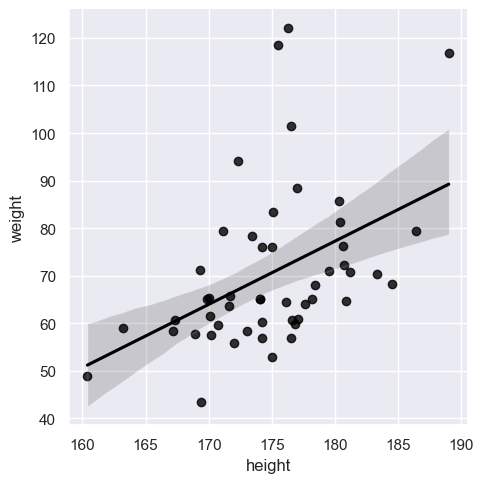

In [15]:
sns.lmplot(x = "height", y = "weight", data = man20,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})
plt.show()

In [3]:
model1 = smf.ols(formula = "weight ~ height", data = man20).fit()

직선의 기울기가 양수이므로 키와 몸무게 간의 양의 상관관계가 있음을 알 수 있다.

### 1-2. 모델 1에 따르면 키가 1cm 커질 때마다 몸무게는 약 몇 kg씩 증가하는가? 또한 모델 1을 이용해 키가 170, 175, 180cm인 남성의 몸무게를 예측하시오.

In [4]:
model1.predict(pd.DataFrame({"height" : [170, 175, 180]}))

0    63.967249
1    70.617807
2    77.268364
dtype: float64

- 밑에 모델 1의 summary를 참고하면 coef(기울기)가 1.33이기에 키가 1cm 커질 때마다 몸무게는 1.33Kg 증가한다.

### 1-3. 모델 1의 summary를 출력하고 잔차의 히스토그램을 그리시오. 모델 1의 잔차는 정규분포 모양을 벗어나는지? Skewness와 Kurtosis 측면에서는 어떠한가?

In [5]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     11.60
Date:                Wed, 28 May 2025   Prob (F-statistic):            0.00134
Time:                        16:17:12   Log-Likelihood:                -205.81
No. Observations:                  50   AIC:                             415.6
Df Residuals:                      48   BIC:                             419.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -162.1517     68.344     -2.373      0.022    -299.566     -24.738
height         1.3301      0.390      3.406      0.001       0.545       2.115
==============================================================================
Omnibus:                       23.888   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.083
Skew:                           1.615   Prob(JB):                     1.46e-08
Kurtosis:                       5.624   Cond. No.                     5.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: ylabel='Count'>

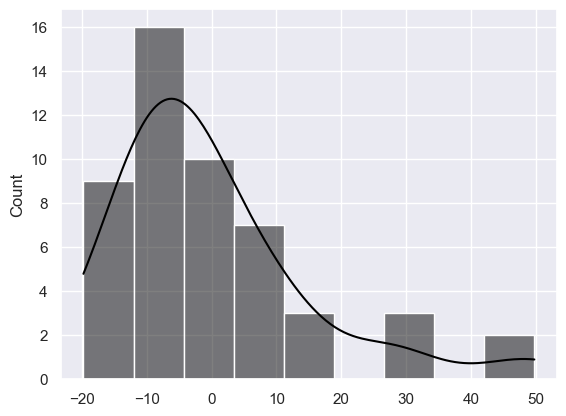

In [6]:
model1_resid = model1.resid
sns.histplot(data = model1_resid, color='black', kde= True)

모델 1의 잔차는 정규분포 모양을 벗어났으며 positive skewness의 형태를 띈다.(위 summary를 참고하면 Skew > 0이므로 오른쪽 꼬리가 긴 그래프임을 알 수 있었다.) <br>
즉 그래프가 오른쪽 꼬리가 더 길고 왼쪽으로 데이터가 치우쳐 있다.

Kurtosis는 위 summary를 통해 값이 5.624 이므로 정규분포의 kurtosis값보다 크므로 정규분포보다 그래프가 더욱 뾰족한 형태이다.

---

## 2.모델의 비교, 결정계수와 잔차
### 2-1. 허리둘레(waist)로 몸무게를 예측하는 선형회귀모델(모델 2)을 만들고, 회귀직선 그래프를 그리시오.

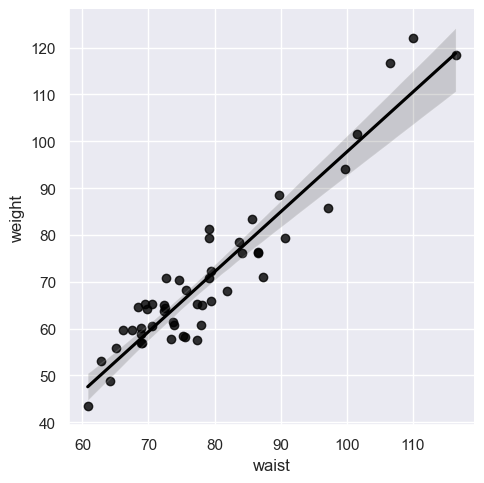

In [7]:
model2 = smf.ols(formula = "weight ~ waist", data = man20).fit()
sns.lmplot(x = "waist", y = "weight", data = man20,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})
plt.show()

### 2-2. 모델1과 모델2를 로그우도, AIC 및 결정계수(R^2) 면에서 각각 비교하라.
어느 모델이 더 우월한가?

In [9]:
print(f'모델 1과 모델 2 비교')
print(f'로그우도 -> 모델 1 : {model1.llf}, 모델 2 : {model2.llf}')
print(f'AIC -> 모델 1 : {model1.aic}, 모델 2 : {model2.aic}')
print(f'결정계수 -> 모델 1 : {model1.rsquared}, 모델2 : {model2.rsquared}')

모델 1과 모델 2 비교
로그우도 -> 모델 1 : -205.80642230521485, 모델 2 : -157.03253591400576
AIC -> 모델 1 : 415.6128446104297, 모델 2 : 318.0650718280115
결정계수 -> 모델 1 : 0.1946771651286322, 모델2 : 0.8855328618798377


로그우도 값이 모델1 보다 모델 2가 더 크므로 모델2가 데이터를 더 잘 설명하고 예측한다.<br>
aic 값이 모델1보다 모델 2가 더 작으므로 모델2가 더 모델이 우수하다. <br>
결정계수 값이 모델 1보다 모델2가 매우 크므로 모델2가 더 유용성이 높은 것을 알 수 있다. 따라서 모델 2가 더 우월한 모델이다.

### 2-3. 모델2의 summary를 출력하고 잔차의 히스토그램을 그리시오. 모델 2의 잔차는 정규분포와 비교해서 어떠한가?

In [11]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     371.3
Date:                Wed, 28 May 2025   Prob (F-statistic):           3.11e-24
Time:                        16:21:29   Log-Likelihood:                -157.03
No. Observations:                  50   AIC:                             318.1
Df Residuals:                      48   BIC:                             321.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -30.1343      5.286     -5.700      0.000     -40.763     -19.505
waist          1.2782      0.066     19.270      0.000       1.145       1.412
==============================================================================
Omnibus:                        1.343   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                1.027
Skew:                           0.024   Prob(JB):                        0.599
Kurtosis:                       2.300   Cond. No.                         522.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='Count'>

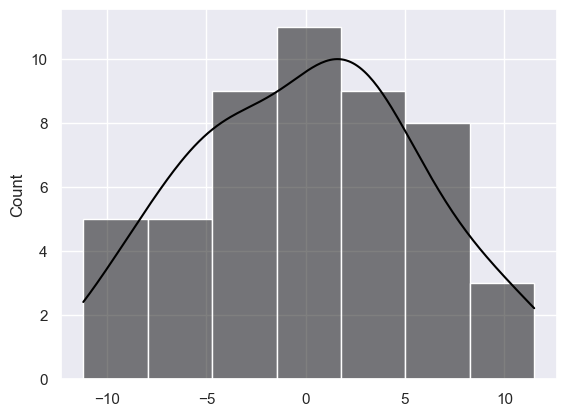

In [12]:
model2_resid = model2.resid
sns.histplot(data = model2_resid, color='black', kde= True)

모델 2의 잔차는 정규분포와 분포가 비슷하며 앞서 출력한 summary를 참고하면 skew 값이 0.024로 0에 가까으므로 <br>
정규분포의 skew값과 매우 가까워 정규분포의 그래프와 유사하며<br>
kurtosis 값은 정규분포의 kurtosis(3)보다 작으므로 그래프가 조금 완만한 것을 알 수 있다.

### 2-4. 모델 1과 모델 2의 잔차를 Q-Q 플롯으로 그려 비교해보시오.

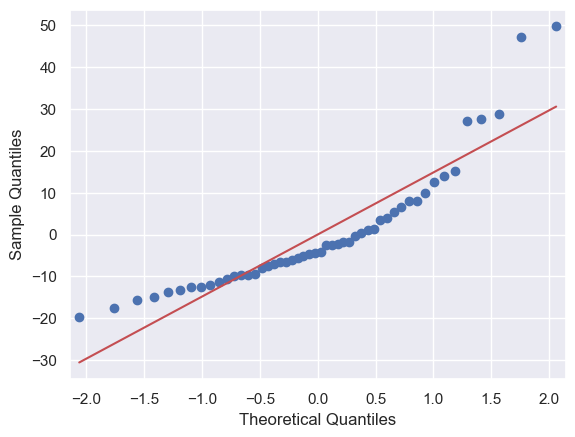

In [13]:
fig1 = sm.qqplot(model1_resid, line = "s")
plt.show()

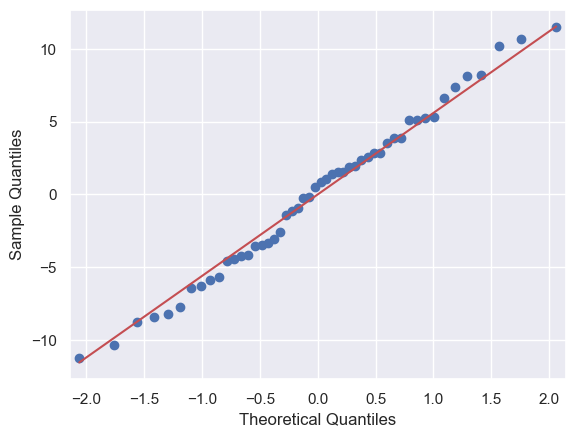

In [14]:
fig2 = sm.qqplot(model2_resid, line = "s")
plt.show()

두 모델의 q-q 그래프를 보면 모델1은 점들이 s자 형태로 띄워져 있으므로 잔차가 정규분포에 잘 따르지 않는다는 것을 알 수 있다.<br>
반면에 모델2는 점들이 기준선 근처에 잘 모여 있으므로 잔차가 정규분포에 잘 따르는 것을 볼 수 있다.